# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S4 E1 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>

**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>

**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.

A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**:

# Bank Customer Churn Dataset

The Bank Customer Churn Dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be customers. The dataset includes the following attributes:

- **Customer ID**: A unique identifier for each customer.
- **Surname**: The customer's surname or last name.
- **Credit Score**: A numerical value representing the customer's credit score.
- **Geography**: The country where the customer resides (France, Spain, or Germany).
- **Gender**: The customer's gender (Male or Female).
- **Age**: The customer's age.
- **Tenure**: The number of years the customer has been with the bank.
- **Balance**: The customer's account balance.
- **NumOfProducts**: The number of bank products the customer uses (e.g., savings account, credit card).
- **HasCrCard**: Whether the customer has a credit card (1 = yes, 0 = no).
- **IsActiveMember**: Whether the customer is an active member (1 = yes, 0 = no).
- **EstimatedSalary**: The estimated salary of the customer.
- **Exited**: Whether the customer has churned (1 = yes, 0 = no).

**Archivos**

* **train.csv** - the training dataset; Exited is the binary target
* **test.csv** - the test dataset; your objective is to predict the probability of Exited
* **sample_submission.csv** - a sample submission file in the correct format


**🟥ES**:

# Bank Customer Churn Dataset

El conjunto de datos de abandono de clientes de bancos es un conjunto de datos comúnmente utilizado para predecir la fuga de clientes en la industria bancaria. Contiene información sobre clientes bancarios que han dejado el banco o continúan siendo clientes. El conjunto de datos incluye los siguientes atributos:

- **Customer ID**: Un identificador único para cada cliente.
- **Surname**: El apellido o apellido del cliente.
- **Credit Score**: Un valor numérico que representa la puntuación de crédito del cliente.
- **Geography**: El país donde reside el cliente (Francia, España o Alemania).
- **Gender**: El género del cliente (Masculino o Femenino).
- **Age**: La edad del cliente.
- **Tenure**: El número de años que el cliente ha estado con el banco.
- **Balance**: El saldo de la cuenta del cliente.
- **NumOfProducts**: El número de productos bancarios que utiliza el cliente (por ejemplo, cuenta de ahorros, tarjeta de crédito).
- **HasCrCard**: Si el cliente tiene una tarjeta de crédito (1 = sí, 0 = no).
- **IsActiveMember**: Si el cliente es un miembro activo (1 = sí, 0 = no).
- **EstimatedSalary**: El salario estimado del cliente.
- **Exited**: Si el cliente ha abandonado el banco (1 = sí, 0 = no).

**Archivos**
* **train.csv** - el conjunto de datos de entrenamiento; Exited es el objetivo binario
* **test.csv** - el conjunto de datos de prueba; su objetivo es predecir la probabilidad de Exited
* **sample_submission.csv** - un archivo de envío de muestra en el formato correcto


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Library import</p>

In [1]:
import os 
import sys
import math
import time
import random
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import xgboost as xgb
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

from itertools import cycle
from sklearn.impute import KNNImputer
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, log_loss, roc_auc_score 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL
plt.style.use({"figure.facecolor": "#282a36"})

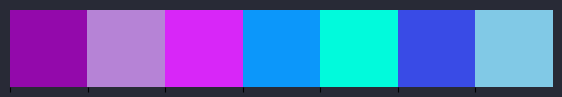

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]
INCLUDE_ORIGINAL = True
SEED = 18
FOLDS = 5
N_SPLITS = 7
sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))


# sns.set_palette(PALETTE_7_C)
warnings.filterwarnings('ignore')

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/playground-series-s4e1"
ORIGINAL_PATH = "/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv"
SUBMISSION_FILENAME = "sample_submission.csv"
TEST_FILENAME = "test.csv"
TRAIN_FILENAME = "train.csv"

TARGET = "Exited"

SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME) 
TEST_DIR = os.path.join(PATH, TEST_FILENAME)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [5]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    # sns.heatmap(corr, annot = False, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    if df.shape[1] < 25:
        sns.heatmap(corr, annot=True, linewidths=.5, fmt=".2f", square=True, mask=mask, cmap=cmap_2)
    else:
        sns.heatmap(corr, annot=False, linewidths=.5, square=True, mask=mask, cmap=cmap_2)

    plt.show()

In [6]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [7]:
def plot_histograms(df, custom_palette):
    """
    Function to plot histograms of all numeric columns in a pandas DataFrame,
    excluding columns with binary values (only 0 and 1).

    :param df: pandas DataFrame containing the data.
    :param custom_palette: a custom color palette for coloring the histograms.
    """
    
    if "id" in df.columns:
        df = df.drop("id", axis=1)

    # Select numeric columns and exclude binary ones
    numeric_columns = df.select_dtypes(include=['number']).columns
    columns_to_plot = [col for col in numeric_columns if not set(df[col].unique()).issubset({0, 1})]

    # Define the number of rows/columns for the layout of the plots
    n_cols = 3
    n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

    # Create an iterator that cycles through the custom colors
    color_cycle = cycle(custom_palette)

    # Create the histograms with cycling custom colors
    plt.figure(figsize=(15, n_rows * 4))
    for i, column in enumerate(columns_to_plot):
        plt.subplot(n_rows, n_cols, i + 1)
        color = next(color_cycle)  # Get the next color from the cycle
        sns.histplot(df[column], bins=30, kde=False, color=color)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

In [8]:
def plot_pie_charts(dataframe, max_unique_values=5, custom_palette=PALETTE_7_C, title=None):
    """
    Plot pie charts for columns in the dataframe that have a limited number of unique values.

    Args:
    dataframe (pd.DataFrame): The dataframe containing the data.
    max_unique_values (int): Maximum number of unique values a column should have to be included.
    custom_palette (list or None): A custom color palette for coloring the pie charts. Default is None.
    title (str or None): A title for the entire figure. Default is None.
    """
    # Identify columns with limited unique values
    limited_value_columns = [col for col in dataframe if dataframe[col].nunique() <= max_unique_values]

    # Number of rows and columns for subplot
    num_cols = 2
    num_rows = (len(limited_value_columns) + 1) // num_cols

    # Creating subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
    axes = axes.flatten()

    if custom_palette is None:
        custom_palette = plt.cm.get_cmap("tab10").colors  # Default palette if custom_palette is not provided

    for idx, col in enumerate(limited_value_columns):
        # Plotting the pie chart for each column with limited unique values with custom colors
        counts = dataframe[col].value_counts()
        axes[idx].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=custom_palette)
        axes[idx].set_title(col)

    # Hide any unused subplots
    for idx in range(len(limited_value_columns), len(axes)):
        axes[idx].set_visible(False)

    if title:
        plt.suptitle(title)  # Add a title for the entire figure

    plt.tight_layout()
    plt.show()

# Example usage with a custom palette (custom_palette) and a title (title)
# plot_pie_charts_for_limited_values(your_dataframe, max_unique_values=5, custom_palette=your_custom_palette, title="Pie Charts for Limited Value Columns")


In [9]:
def plot_multiple_custom_scatters(dataframe, comparisons, hue, palette, titles):
    """
    Plot multiple custom scatter plots for the specified comparisons in the dataframe, 
    with color based on a specified hue column and using a custom color palette.

    Args:
    dataframe (pd.DataFrame): The dataframe containing the data.
    comparisons (list of tuples): A list of tuples, where each tuple contains two strings 
                                  representing the columns to be compared.
    hue (str): The name of the column to be used for coloring the points.
    palette (dict): A dictionary defining the color palette.
    titles (list of str): The titles of the plots.
    """
    num_plots = len(comparisons)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols

    # Creating subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
    axes = axes.flatten()

    for idx, (x, y) in enumerate(comparisons):
        sns.scatterplot(data=dataframe, x=x, y=y, hue=hue, palette=palette, ax=axes[idx])
        axes[idx].set_title(titles[idx])

    # Hide any unused subplots
    for idx in range(num_plots, len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

In [10]:
def plot_cont(col, ax, color=PALETTE_7[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query('set=="train"'),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

In [11]:
def cat_encoder(df):
    """
    Automatically detect and apply one-hot encoding to categorical columns in the dataframe.

    Args:
    dataframe (pd.DataFrame): The dataframe containing the data.

    Returns:
    pd.DataFrame: A new dataframe with one-hot encoded columns.
    """
    # Detecting categorical columns
    cat_columns = df.select_dtypes(include=['object', 'category']).columns

    for col in cat_columns:
        # Get one-hot encoded dataframe
        enc_df = pd.get_dummies(df[col], prefix=col)
        # Drop the original column
        df = df.drop(col, axis=1)
        # Concatenate the new columns
        df = pd.concat([df, enc_df], axis=1)

    return df

In [12]:
def label_encode(dataframe):
    cat_cols = dataframe.select_dtypes(include=['object', 'category']).columns
    
    for col in cat_cols:
        le = LabelEncoder()
        le.fit(dataframe[col])
        dataframe[col] = le.transform(dataframe[col])
        
    return dataframe

In [13]:
def num_imputer(df):
    imputer = KNNImputer()
    numeric_cols = df.select_dtypes('number').columns
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    return df

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [14]:
train_df = pd.read_csv(TRAIN_DIR)
test_df = pd.read_csv(TEST_DIR)
original_df = pd.read_csv(ORIGINAL_PATH)
submission_df = pd.read_csv(SUBMISSION_DIR)

comb_df = pd.concat([train_df, original_df], ignore_index=True)

In [15]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [16]:
train_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
train_df=train_df.drop(["id"], axis=1)
test_df=test_df.drop(["id"], axis=1)

In [18]:
categorical_vars = comb_df.select_dtypes(include=["object", "category"]).columns.tolist()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

In [19]:
data_description(train_df)
data_description(test_df)
data_description(original_df)

Data description
Total number of records 165034
number of features 13


               Name     Type  Unique levels  Missing
0        CustomerId    int64          23221        0
1           Surname   object           2797        0
2       CreditScore    int64            457        0
3         Geography   object              3        0
4            Gender   object              2        0
5               Age  float64             71        0
6            Tenure    int64             11        0
7           Balance  float64          30075        0
8     NumOfProducts    int64              4        0
9         HasCrCard  float64              2        0
10   IsActiveMember  float64              2        0
11  EstimatedSalary  float64          55298        0
12           Exited    int64              2        0
Data description
Total number of records 110023
number of features 12


               Name     Type  Unique levels  Missing
0        CustomerId    int64          19698        0
1       

<Axes: >

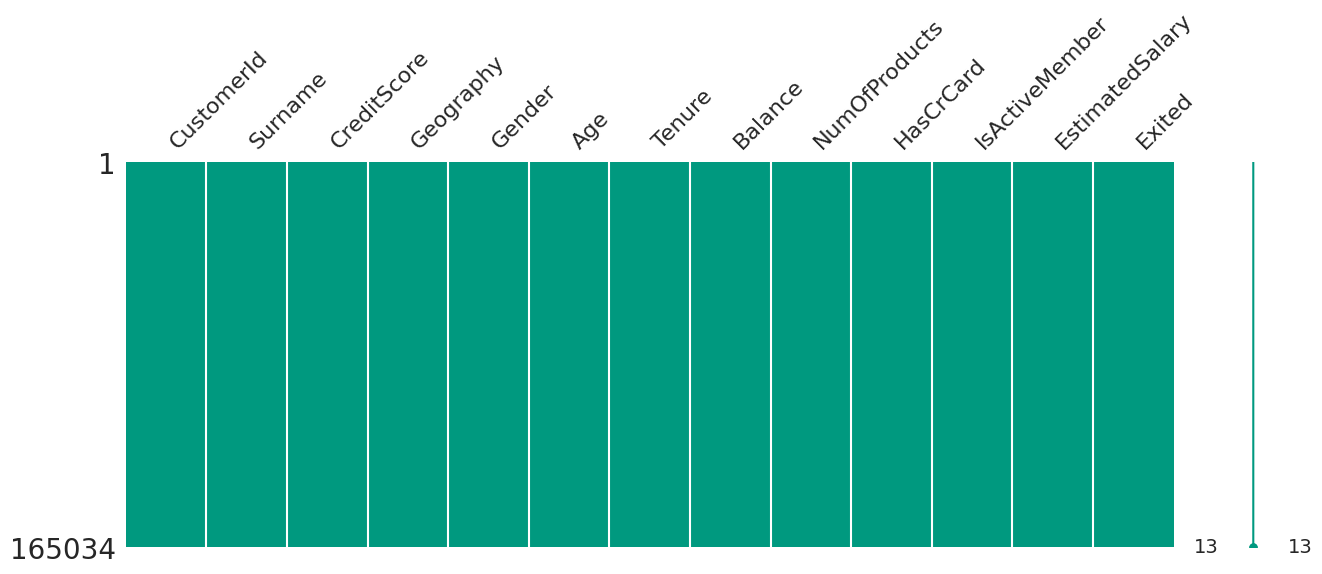

In [20]:
msno.matrix(df=train_df, figsize=(15,5), color=(0,0.6,0.5))

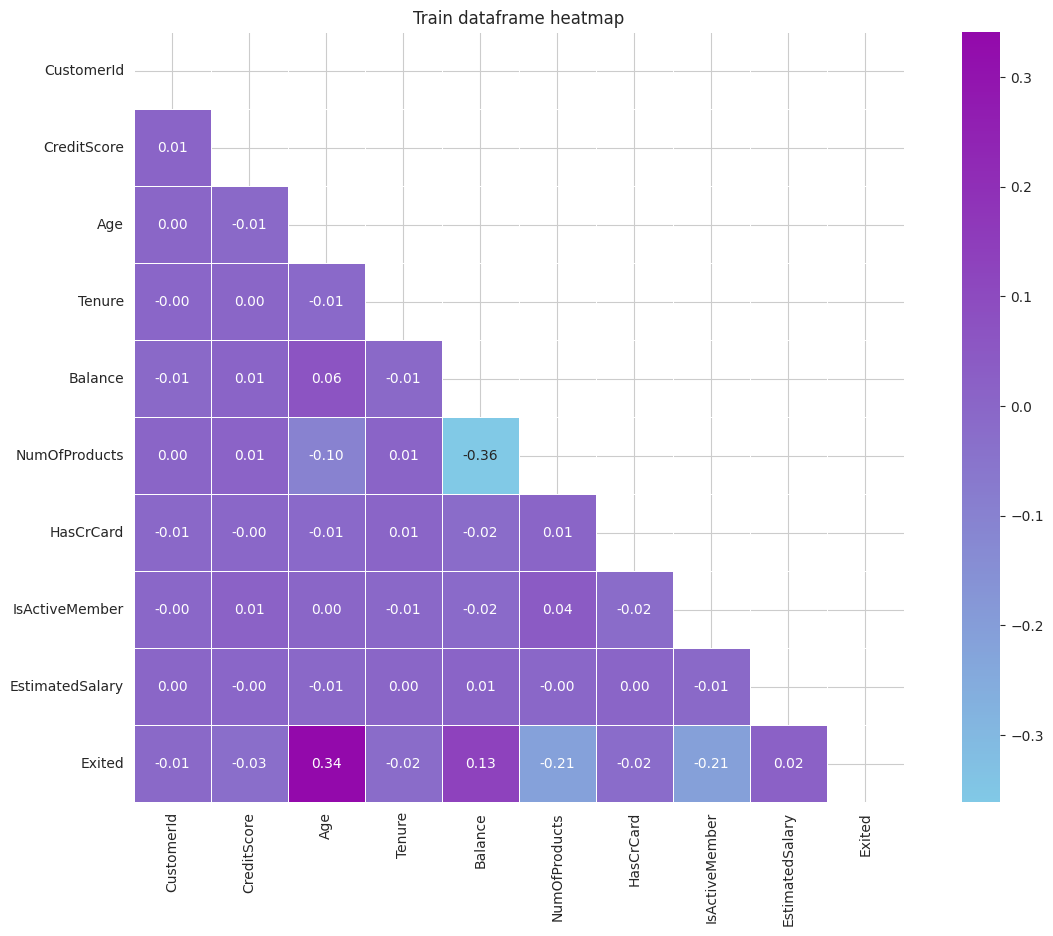

None

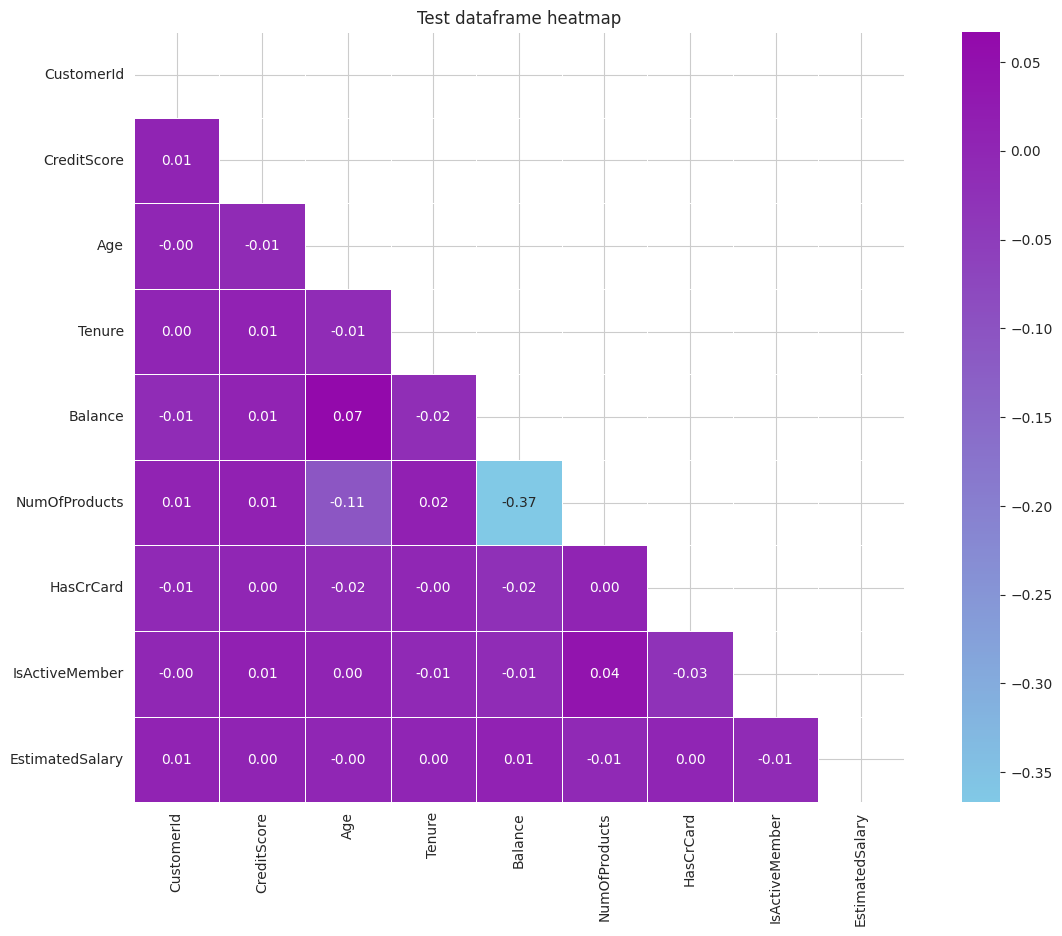

None

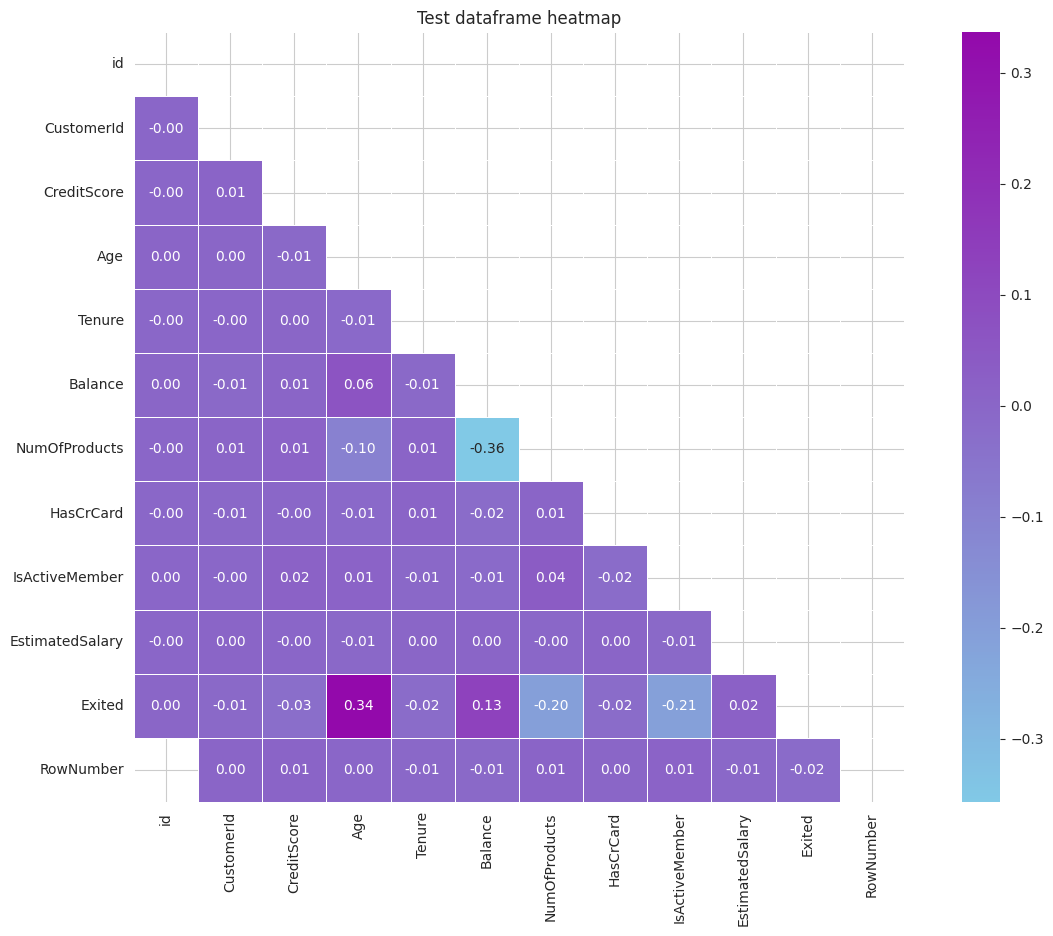

None

In [21]:
train_df_n = train_df.select_dtypes(include=['number'])
display(show_corr_heatmap(train_df_n, "Train dataframe heatmap"))
test_df_n = test_df.select_dtypes(include=['number'])
display(show_corr_heatmap(test_df_n, "Test dataframe heatmap"))
comb_df_n = comb_df.select_dtypes(include=['number'])
display(show_corr_heatmap(comb_df_n, "Test dataframe heatmap"))

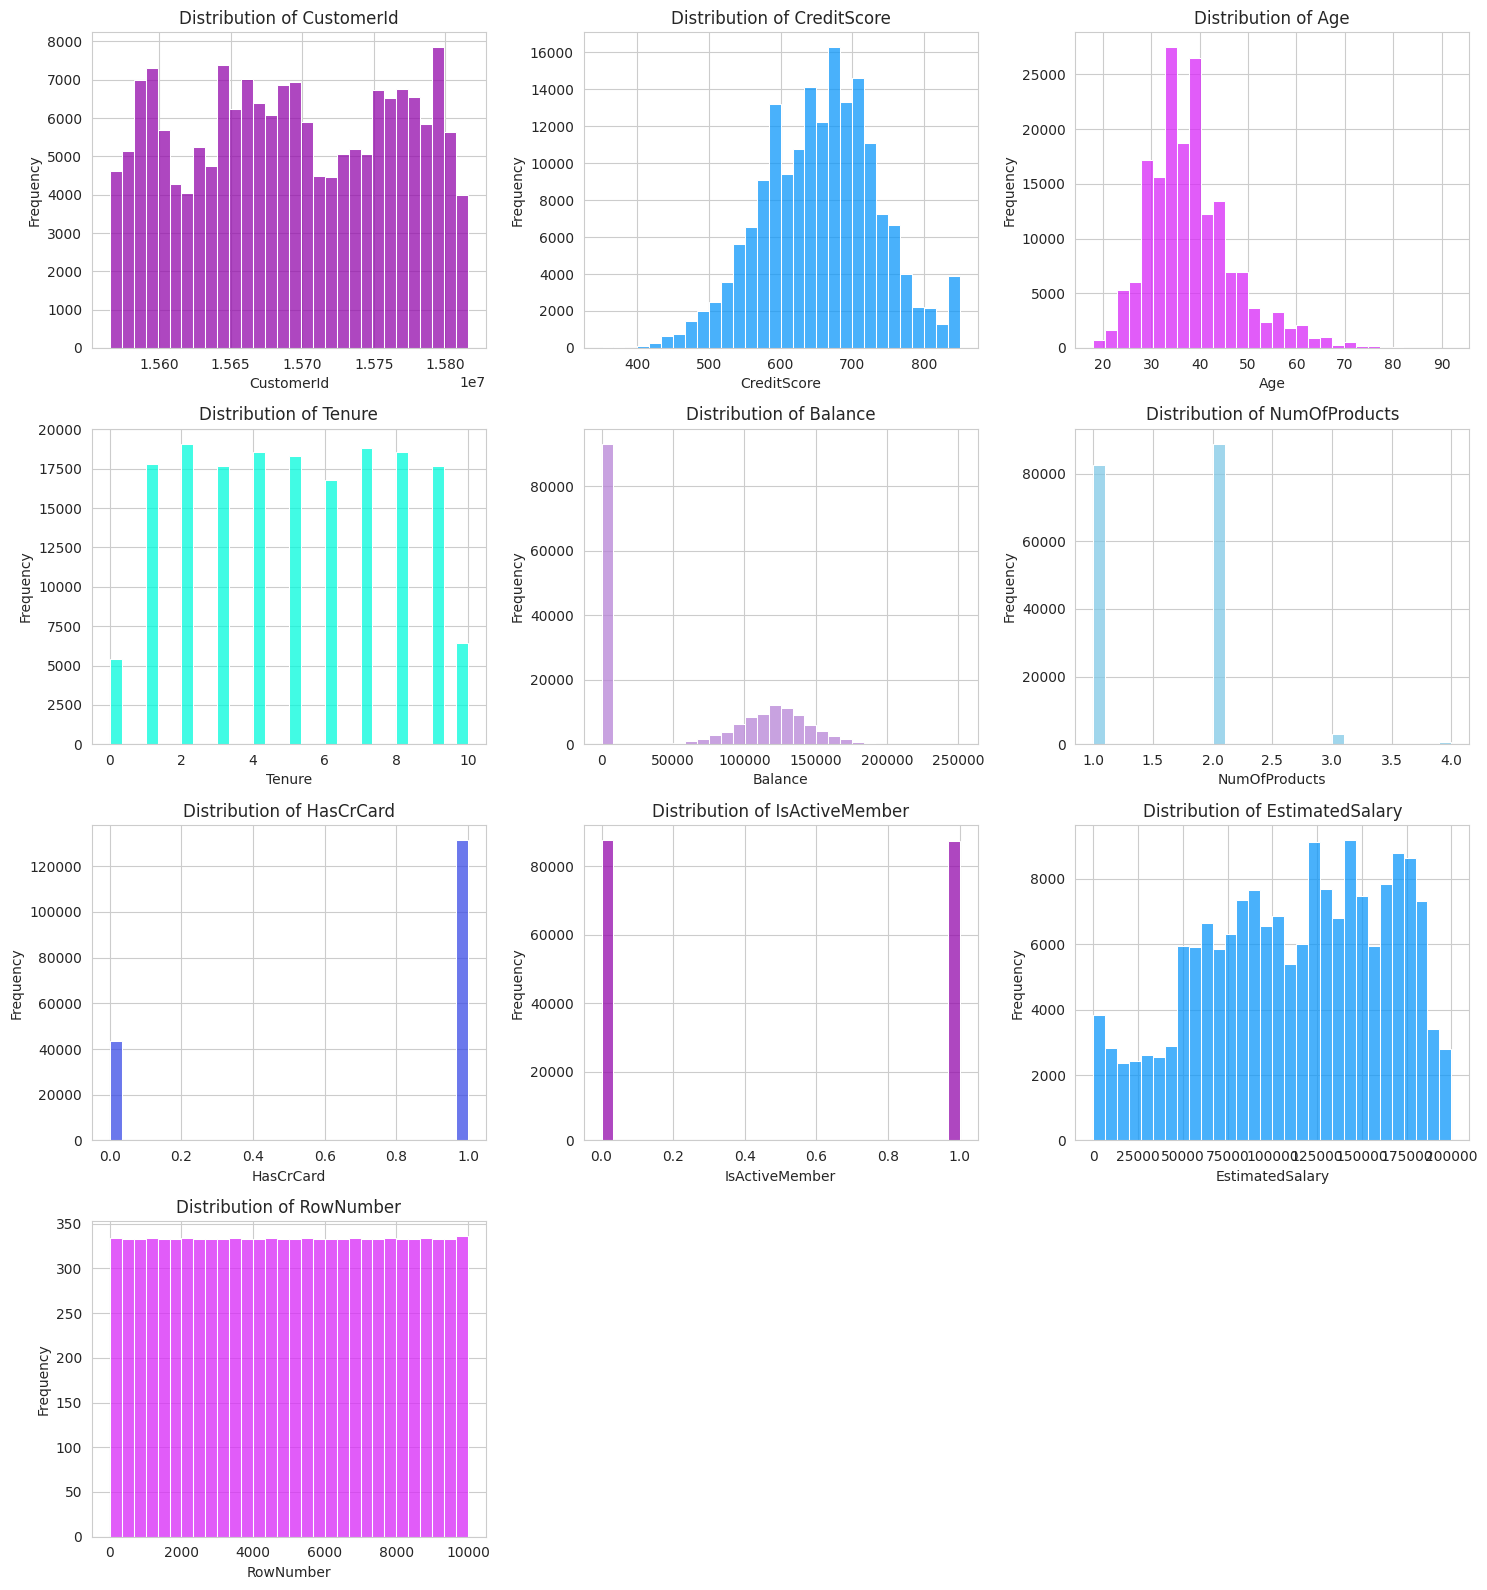

None

In [22]:
# display(plot_histograms(train_df))
display(plot_histograms(comb_df, PALETTE_7_C))

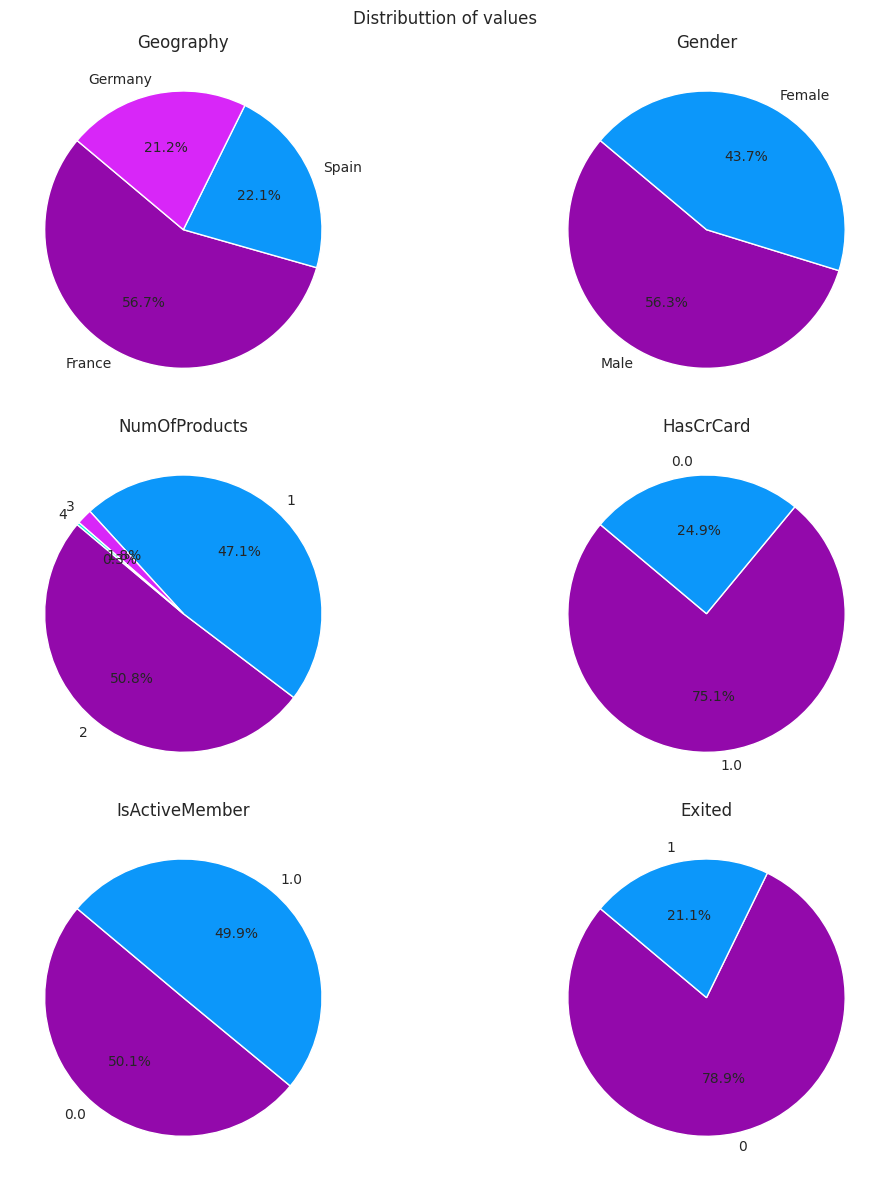

None

In [23]:
display(plot_pie_charts(comb_df, max_unique_values=4, custom_palette=PALETTE_7_C, title="Distributtion of values"))

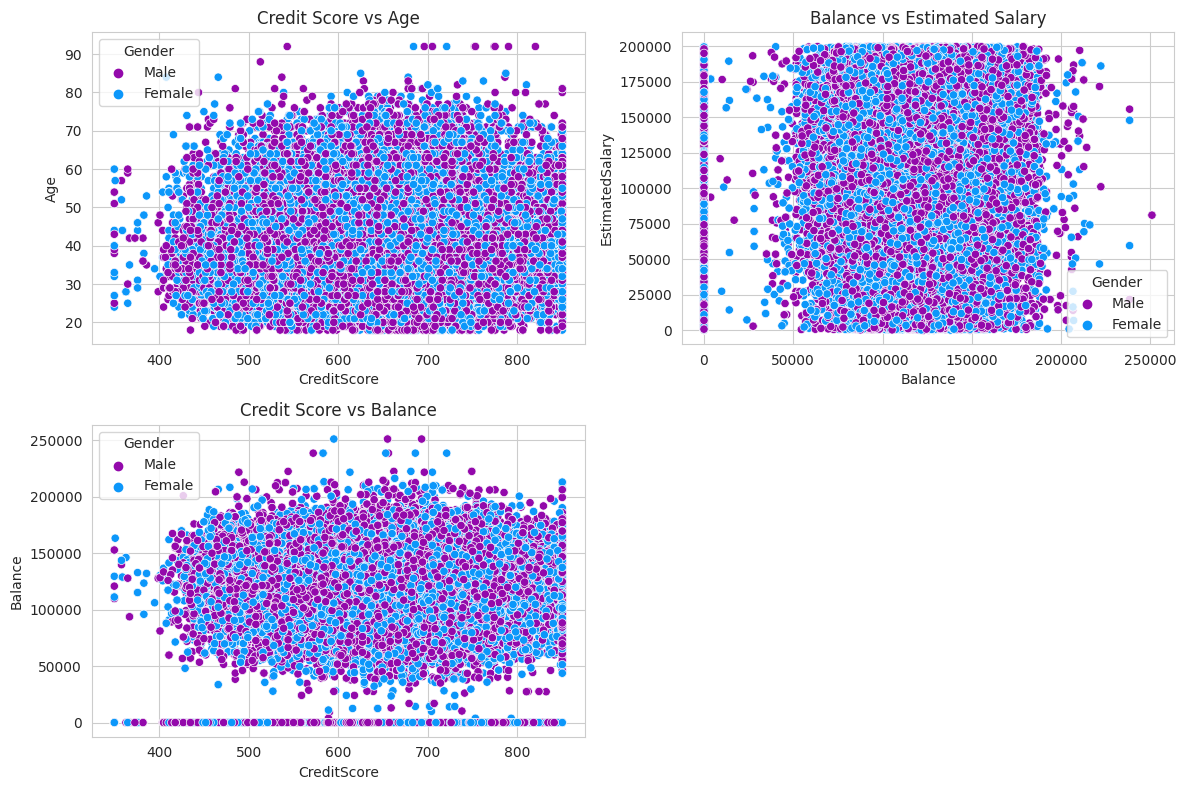

In [24]:
all_comparisons = [
    ('CreditScore', 'Age'),
    ('Balance', 'EstimatedSalary'),
    ('CreditScore', 'Balance'),
]
all_titles = [
    'Credit Score vs Age', 
    'Balance vs Estimated Salary',  
    'Credit Score vs Balance'
]
palette = {"Male": PALETTE_7_C[0], "Female": PALETTE_7_C[1]}
plot_multiple_custom_scatters(comb_df, all_comparisons, "Gender", palette, all_titles)

In [25]:
# train_df_e = cat_encoder(train_df)
# test_df_e = cat_encoder(test_df)
# comb_df = cat_encoder(comb_df)

In [26]:
comb_df = label_encode(comb_df)
train_df = label_encode(train_df)
test_df = label_encode(test_df)

In [27]:
train_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,1701,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,1918,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,1172,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,15689614,1176,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [28]:
data_description(comb_df)
data_description(train_df)
data_description(test_df)

Data description
Total number of records 175036
number of features 15


               Name     Type  Unique levels  Missing
0                id  float64         165034    10002
1        CustomerId    int64          23421        0
2           Surname    int64           2932        0
3       CreditScore    int64            460        0
4         Geography    int64              4        0
5            Gender    int64              2        0
6               Age  float64             73        1
7            Tenure    int64             11        0
8           Balance  float64          30239        0
9     NumOfProducts    int64              4        0
10        HasCrCard  float64              2        1
11   IsActiveMember  float64              2        1
12  EstimatedSalary  float64          55581        0
13           Exited    int64              2        0
14        RowNumber  float64          10000   165034
Data description
Total number of records 165034
number of features 13


        

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Model</p>

In [29]:
def train_xgboost_with_kfold(df, features, target_col = TARGET, params=None, seed = SEED, n_splits = 10):
    """
    Train an XGBoost model with k-fold cross-validation.

    Args:
    df (pd.DataFrame): The dataset containing features and target variable.
    target_col (str): The name of the target variable column.
    features (list): List of feature columns to use.
    params (dict): Hyperparameters for the XGBoost model.
    seed (int): Random seed for reproducibility.

    Returns:
    tuple: A tuple containing the trained model and predictions.
    """
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
#     df = xgb.DMatrix(data=df, label=features, enable_categorical=True)

    if params is None:
        params = {
            'objective': 'binary:logistic',
            'max_depth': 3,
            'learning_rate': 0.1,
            'n_estimators': 100,
            'eval_metric': 'logloss'
        }
        
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    model = xgb.XGBClassifier(**params)
    
    
    rcs_f = []  # List to store ROC AUC scores for each fold
    loglosses = []  # List to store log loss values for each fold
    pred_f = []  # List to store predictions for each fold
    fold = 1

    for train_index, test_index in kf.split(X[features], y):
        X_train, X_test = X[features].iloc[train_index], X[features].iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the XGBoost model and evaluate on the test set
        model.fit(X_train,
                  y_train,
                  eval_set=[(X_test, y_test)],
                  verbose=512)
        
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:,1]
        
        loglss_f = log_loss(y_test, y_pred_proba)
        fold_roc = roc_auc_score(y_test, y_pred_proba)
        rcs_f.append(fold_roc)
        loglosses.append(loglss_f)
        
        print(f"{red}~~~~~~~~~~~~~~~FOLD {fold}~~~~~~~~~~~~~~~{res}")
        print(f"{mgta}ROC:{res} {cyn}{fold_roc} {res}\n{mgta}Logloss:{res} {cyn}{loglss_f}{res}")
        
        fold += 1
        
        # Make predictions on the test set for this fold
        test_pred = model.predict_proba(test_df[features])[:,1]
        pred_f.append(test_pred)
        
    # Calculate mean predictions across all folds
    predictions = np.mean(pred_f, axis=0)
    print(f"\n\n{red}#################INFO#################{res}")
    print(f"{blue}Fold Accuracies:{res} {cyn}{rcs_f}{res}\n{blue}Fold Log Losses:{res}{cyn}{loglosses}{res}")
    print(f"{blue}Mean AUC:{res}{cyn}{sum(rcs_f) / len(rcs_f)}{res}\n{blue}Mean Log Loss:{res} {cyn}{sum(loglosses) / len(loglosses)}{res}")

    return model, predictions 

In [30]:
params = {
        'n_jobs'                : -1,
        'max_depth'             : 10,
        'early_stopping_rounds' : 250,
        'learning_rate'         : 0.05,
        'subsample'             : 0.80,
        'colsample_bytree'      : 0.35,
        'reg_lambda'            : 1.00,
        'reg_alpha'             : 1.00,
        'gamma'                 : 1.00,
        'random_state'          : SEED,
        'eval_metric'           : 'auc',
        'booster'               : 'gbtree',
        'tree_method'           : 'auto',
        'objective'             : 'binary:logistic',
         }

In [31]:
no_include_cols = ['CustomerId', 'Exited']
feat = [fts for fts in train_df.columns if fts not in no_include_cols]

In [32]:
model_pred, xgb_pred = train_xgboost_with_kfold(train_df, feat, TARGET, params, SEED, 10)

[0]	validation_0-auc:0.68394
[99]	validation_0-auc:0.88708
~~~~~~~~~~~~~~~FOLD 1~~~~~~~~~~~~~~~
ROC: 0.8870918209607557 
Logloss: 0.33992122517019585
[0]	validation_0-auc:0.68543
[99]	validation_0-auc:0.88476
~~~~~~~~~~~~~~~FOLD 2~~~~~~~~~~~~~~~
ROC: 0.8847755279380844 
Logloss: 0.3442075171622709
[0]	validation_0-auc:0.68451
[99]	validation_0-auc:0.88705
~~~~~~~~~~~~~~~FOLD 3~~~~~~~~~~~~~~~
ROC: 0.8870605475111704 
Logloss: 0.3410010738406294
[0]	validation_0-auc:0.68820
[99]	validation_0-auc:0.88169
~~~~~~~~~~~~~~~FOLD 4~~~~~~~~~~~~~~~
ROC: 0.8816923569021723 
Logloss: 0.3446064220612846
[0]	validation_0-auc:0.68146
[99]	validation_0-auc:0.88395
~~~~~~~~~~~~~~~FOLD 5~~~~~~~~~~~~~~~
ROC: 0.8839488337606307 
Logloss: 0.3429647519215964
[0]	validation_0-auc:0.69142
[99]	validation_0-auc:0.88687
~~~~~~~~~~~~~~~FOLD 6~~~~~~~~~~~~~~~
ROC: 0.8870218018888415 
Logloss: 0.3401148213878276
[0]	validation_0-auc:0.68987
[99]	validation_0-auc:0.88602
~~~~~~~~~~~~~~~FOLD 7~~~~~~~~~~~~~~~
ROC: 0.88

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Submission</p>

In [33]:
submission_df[TARGET] = xgb_pred
submission_df.to_csv('submission.csv', index=False)

## Thanks for your support, the notebook is still in process, the model will be uploaded soon.